# <left> <font color='#de072e'>I- Preprocessing</font> </left> 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
col_names = ['User_name','Tweets_text', 'Source']
tweets_df = pd.read_csv('data_tweets.csv', header=None, names=col_names)
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16936 entries, 0 to 16935
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   User_name    16936 non-null  object
 1   Tweets_text  16936 non-null  object
 2   Source       16904 non-null  object
dtypes: object(3)
memory usage: 397.1+ KB


In [3]:
tweets_df[tweets_df['Tweets_text'].duplicated(keep=False)].sort_values('Tweets_text').head(8)

,User_name,Tweets_text,Source
15561,MacaesBruno,805 Covid deaths in Germany today. Now well ab...,"<a href=""http://twitter.com/#!/download/ipad"" ..."
16434,BrunoBotMacaes,805 Covid deaths in Germany today. Now well ab...,"<a href=""http://www.changeitlater.com"" rel=""no..."
12009,KCchemguy,Agreed,"<a href=""http://twitter.com/download/iphone"" r..."
3454,DingDon47296742,Agreed,"<a href=""http://twitter.com/download/iphone"" r..."
3223,ianrobo1,Been catching up on this ... Esther was great,"<a href=""http://twitter.com/download/iphone"" r..."
8042,ianrobo1,Been catching up on this ... Esther was great,"<a href=""https://about.twitter.com/products/tw..."
8674,deahuq1,Check out my Gig on Fiverr: do black and white...,"<a href=""https://mobile.twitter.com"" rel=""nofo..."
12097,deahuq1,Check out my Gig on Fiverr: do black and white...,"<a href=""https://mobile.twitter.com"" rel=""nofo..."


In [4]:
tweets_df = tweets_df.drop_duplicates('Tweets_text')
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10558 entries, 0 to 16934
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   User_name    10558 non-null  object
 1   Tweets_text  10558 non-null  object
 2   Source       10530 non-null  object
dtypes: object(3)
memory usage: 329.9+ KB


==> as we can see in our dataFrame there is rows that has null value so we need first to dispose these rows so that we can work on equal rows/columns

In [5]:
#First replace all the empty rows with NAN value 
tweets_df['Source'].replace('', np.nan, inplace=True)
#Then we drop those rows
tweets_df.dropna(subset=['Source'], inplace=True)
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10530 entries, 0 to 16934
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   User_name    10530 non-null  object
 1   Tweets_text  10530 non-null  object
 2   Source       10530 non-null  object
dtypes: object(3)
memory usage: 329.1+ KB


In [6]:
tweets_df.head()

,User_name,Tweets_text,Source
0,sectest9,RT @Arcserve: 2020 saw rampant #cyberattacks o...,"<a href=""https://ho.com"" rel=""nofollow"">auto i..."
1,pizza_czar,RT @TMZ: Viral 'Dreams' Skateboarder Nathan Ap...,"<a href=""http://twitter.com/download/iphone"" r..."
2,stubbysquid,Ok so I just talked to my doctor and because a...,"<a href=""https://mobile.twitter.com"" rel=""nofo..."
3,MikePShanahan,What he means to say: ‘ COVID part one went re...,"<a href=""https://mobile.twitter.com"" rel=""nofo..."
4,jennicat777,RT @drdavidsamadi: I feel like I’ve been repea...,"<a href=""http://twitter.com/download/android"" ..."


## <left> <font color='#60a86d'>1- Tweets Cleaning</font> </left> 

In [7]:
# Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub('(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)',' ', text) #Removing @mentions
    text = re.sub('#', '', text) # Removing '#' hash tag
    text = re.sub('RT[\s]+',  '', text) # Removing RT
    text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
    return text

def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

# Clean the tweets
tweets_df['Tweets_text'] = tweets_df['Tweets_text'].apply(cleanTxt)
tweets_df['Tweets_text'] = tweets_df['Tweets_text'].apply(deEmojify)

# Show the cleaned tweets
tweets_df.head(10)

,User_name,Tweets_text,Source
0,sectest9,2020 saw rampant cyberattacks on US hospitals...,"<a href=""https://ho.com"" rel=""nofollow"">auto i..."
1,pizza_czar,Viral Dreams Skateboarder Nathan Apodaca Tes...,"<a href=""http://twitter.com/download/iphone"" r..."
2,stubbysquid,Ok so I just talked to my doctor and because a...,"<a href=""https://mobile.twitter.com"" rel=""nofo..."
3,MikePShanahan,What he means to say COVID part one went re...,"<a href=""https://mobile.twitter.com"" rel=""nofo..."
4,jennicat777,I feel like I ve been repeating myself quite a...,"<a href=""http://twitter.com/download/android"" ..."
5,the_real_tsnutz,Mitch McConnell and Republicans want to block ...,"<a href=""http://twitter.com/download/iphone"" r..."
7,MsActiviss,Memorable Trump Lies Inject disinfectant for...,"<a href=""http://twitter.com/download/android"" ..."
8,order_personal,CDC Reveals Hospitals Counted 130 000 Heart At...,"<a href=""https://mobile.twitter.com"" rel=""nofo..."
9,PRKramer1,Ohio State Faithful Not Happy With Michigan Fo...,"<a href=""http://twitter.com/download/android"" ..."
10,EcoHubb,Concentrations of methane surged by a near rec...,"<a href=""http://twitter.com/download/android"" ..."


In [8]:
#Create a new csv file with the cleande tweets
tweets_df = tweets_df.set_index('Tweets_text') 
tweets_df.to_csv('clean_txeets_text.csv')

In [9]:
df = pd.read_csv('clean_txeets_text.csv')
#First replace all the empty rows with NAN value 
df['Tweets_text'].replace('', np.nan, inplace=True)
#Then we drop those rows
df.dropna(subset=['Tweets_text'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10529 entries, 0 to 10529
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Tweets_text  10529 non-null  object
 1   User_name    10529 non-null  object
 2   Source       10529 non-null  object
dtypes: object(3)
memory usage: 329.0+ KB


## <left> <font color='#60a86d'>2- Natural language processing (NLP)</font> </left> 

In [10]:
#important libraries for preprocessing using NLTK
import nltk
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import TweetTokenizer


[nltk_data] Downloading package wordnet to /home/oumaima/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/oumaima/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/oumaima/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [11]:
def preprocess_data(data):
    #Removes Numbers
    data = data.astype(str).str.replace('\d+', '')
    lower_text = data.str.lower()
    lemmatizer = nltk.stem.WordNetLemmatizer()
    w_tokenizer =  TweetTokenizer()
    def lemmatize_text(text):
        return [(lemmatizer.lemmatize(w)) for w in w_tokenizer.tokenize((text))]
    def remove_punctuation(words):
        new_words = []
        for word in words:
            new_word = re.sub(r'[^\w\s]', '', (word))
            if new_word != '':
                new_words.append(new_word)
        return new_words
    words = lower_text.apply(lemmatize_text)
    words = words.apply(remove_punctuation)
    return pd.DataFrame(words)

pre_tweets = preprocess_data(df['Tweets_text'])
df['text'] = pre_tweets
stop_words = set(stopwords.words('english'))
df['text'] = df['text'].apply(lambda x: [item for item in x if item not in stop_words])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10529 entries, 0 to 10529
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Tweets_text  10529 non-null  object
 1   User_name    10529 non-null  object
 2   Source       10529 non-null  object
 3   text         10529 non-null  object
dtypes: object(4)
memory usage: 411.3+ KB


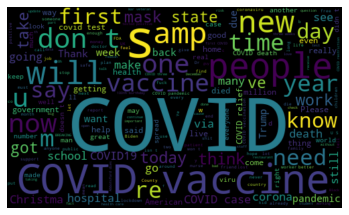

In [13]:
from wordcloud import WordCloud
#WordCloud visualization
allWords = ' '.join([twts for twts in df['Tweets_text']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# <left> <font color='#de072e'>II-Tweets Classification</font> </left> 

## <left> <font color='#60a86d'>1- Word2Vec</font> </left> 

In [15]:
from gensim.models import Word2Vec
sentences = df['text']
model = Word2Vec(sentences, min_count=1)

In [16]:
print (list(model.wv.vocab))
print (len(list(model.wv.vocab)))

['saw', 'rampant', 'cyberattacks', 'u', 'hospital', 'healthcare', 'provider', 'continue', 'arcserve', 'sam', 'roguine', 'pr', 'viral', 'dream', 'skateboarder', 'nathan', 'apodaca', 'test', 'positive', 'covid', 'ok', 'talked', 'doctor', 'friend', 'sent', 'link', 'taking', 'ivermectin', 'anaphylaxis', 'mean', 'say', 'part', 'one', 'went', 'really', 'well', 'many', 'took', 'without', 'even', 'questioning', 'feel', 'like', 'repeating', 'quite', 'bit', 'still', 'message', 'understood', 'lockdown', 'c', 'mitch', 'mcconnell', 'republican', 'want', 'block', 'dol', 'state', 'osha', 'able', 'hold', 'employer', 'accountab', 'memorable', 'trump', 'lie', 'inject', 'disinfectant', 'another', 'hoax', 'inauguration', 'crowd', 'size', 'cdc', 'reveals', 'counted', 'heart', 'attack', 'flu', 'bacterial', 'pneumonia', 'death', 'ohio', 'faithful', 'happy', 'michigan', 'football', 'concentration', 'methane', 'surged', 'near', 'record', 'rate', 'last', 'year', 'per', 'billion', 'level', 'higher', 'truly', 'si

In [17]:
X = model[model.wv.vocab]

/home/oumaima/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [18]:
from nltk.cluster import KMeansClusterer
import nltk
NUM_CLUSTERS=5
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
print (assigned_clusters)

[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 

In [19]:
words = list(model.wv.vocab)
for i, word in enumerate(words):  
    print (word + ":" + str(assigned_clusters[i]))

saw:0
rampant:0
cyberattacks:1
u:0
hospital:0
healthcare:0
provider:0
continue:0
arcserve:0
sam:0
roguine:0
pr:0
viral:0
dream:0
skateboarder:0
nathan:0
apodaca:0
test:0
positive:0
covid:0
ok:0
talked:0
doctor:0
friend:0
sent:0
link:0
taking:0
ivermectin:0
anaphylaxis:0
mean:0
say:0
part:0
one:0
went:0
really:0
well:0
many:0
took:0
without:0
even:0
questioning:0
feel:0
like:0
repeating:2
quite:0
bit:0
still:0
message:0
understood:3
lockdown:0
c:0
mitch:0
mcconnell:0
republican:0
want:0
block:0
dol:1
state:0
osha:0
able:0
hold:0
employer:0
accountab:1
memorable:0
trump:0
lie:0
inject:2
disinfectant:0
another:0
hoax:0
inauguration:0
crowd:0
size:0
cdc:0
reveals:0
counted:0
heart:0
attack:0
flu:0
bacterial:0
pneumonia:0
death:0
ohio:0
faithful:1
happy:0
michigan:0
football:0
concentration:0
methane:3
surged:0
near:0
record:0
rate:0
last:0
year:0
per:0
billion:0
level:0
higher:0
truly:0
sick:0
seeing:0
stuff:0
mass:0
transit:0
safe:0
eating:0
restaurant:0
lol:0
okay:0
today:0
bombshell:0
u

mph:0
medicaid:0
reimburse:0
rider:0
horrified:0
large:0
rat:0
subway:0
bear:0
mind:0
considered:0
fair:0
blu:0
hand:0
sanitiser:1
pussy:0
tho:0
buccaneer:0
special:0
concern:0
sunday:0
tampa:0
bay:0
punter:0
bradley:0
pinion:0
kicker:0
ryan:0
succop:0
inaction:0
gop:0
covidization:0
scrutinized:0
intensely:0
guttenberg:0
voted:0
screen:0
sat:0
covidinsa:2
ad:0
approach:0
budget:0
brea:0
vermont:0
occurred:0
super:0
bu:0
labor:0
surgical:0
protect:0
wearer:0
transmissible:0
unfold:0
anmc:0
alaskan:2
christiane:1
northrup:0
mur:2
comic:0
sans:0
novaerus:0
purifier:0
patented:0
plasma:0
techno:2
denis:1
lord:0
taketh:0
archery:2
lesson:0
release:0
correction:0
reflection:0
designing:0
prevalence:0
far:0
deadliest:0
bubonic:0
plague:0
century:0
mi:0
pentagon:2
appear:0
mbc:0
documentary:0
premiering:2
iirc:1
easy:0
conduct:0
grace:0
wel:0
une:0
train:0
pharmacy:0
technician:0
administer:0
dropping:0
saying:0
accepting:0
weaker:0
protracted:2
thaleex:2
leg:0
sarcopenia:4
muscle:0
mum:0
nep

chronicle:0
thick:0
remarkable:0
starring:1
break:0
nev:3
atl:0
repeat:0
mutatin:1
rollison:0
malaty:0
rivera:0
epidemiologist:0
sake:0
printing:0
stressed:0
immunoprecise:0
litevax:0
advance:0
ipa:0
ipatd:0
antibod:1
connected:0
fanbase:2
skyartslate:1
sky:0
insensitive:0
ferocious:2
tiny:0
midwife:1
contribution:0
invaluable:0
emerg:0
auth:0
sarscov:0
relies:2
continued:0
app:0
fill:0
pet:0
pork:0
taxpayer:0
expensive:0
taxthechurches:0
wor:0
depression:0
suicide:0
scott:0
moe:0
mitigating:0
shitshow:0
borishasfailedthena:0
refer:0
explanation:0
plain:1
pandering:0
directed:1
deployed:0
eternal:3
dade:1
province:0
dent:1
actual:0
fack:0
smarten:0
covidontario:1
bishop:0
wabash:0
parkview:0
partnering:0
provid:1
luke:3
vial:0
assume:1
studied:0
liarjohnsonresign:0
fallguy:0
torybrexitcoup:0
incompet:0
alltories:0
backer:0
cont:0
plun:0
vape:0
flavor:0
enjoyable:0
interviewing:0
idol:0
career:0
gained:0
weight:0
lonely:2
worried:0
wrath:0
coppin:1
adviser:0
urged:0
mail:0
ballot:0
cure

easily:0
mccoy:0
annually:0
coof:3
overworked:4
scd:0
avoided:0
shed:0
perisc:3
nope:0
relative:0
rock:0
lecture:0
dise:1
unleashed:0
economist:0
physicist:0
nuclear:2
cardiologist:1
pointless:0
tre:1
clued:0
pill:0
model:0
investing:0
sprawling:0
mansion:0
lamborghinis:0
kowtow:0
po:0
som:2
realistic:1
insurance:0
aca:0
bankr:0
journalism:0
tremenda:0
compliance:0
regulation:0
obstacle:0
politishaun:0
surviable:0
bruin:4
sputnik:0
limited:0
populist:0
winger:0
discovers:0
bein:0
authoriza:2
andile:1
waffle:1
trumpet:2
exposing:0
fp:1
schnedlitz:0
charlatan:0
gla:0
ove:0
mbeumo:2
grannie:2
iron:0
ltch:0
constituent:0
eager:3
ceased:0
dictate:0
yup:0
legacy:0
alright:0
meaningful:2
manner:0
yves:0
duroseau:0
lenox:0
pcrtest:1
deepstateswamp:0
pilgrimage:1
colorless:0
withholdyourvote:2
opposes:2
havoc:0
emplo:0
steven:0
libs:2
eventually:4
ac:0
kiwi:0
brace:0
faculty:0
ecology:0
evolutionary:0
scdaa:0
marac:1
chase:0
paralyzed:2
trauma:0
separation:0
durham:3
whitby:2
improving:0
wednes

uhm:2
boyd:1
congregate:0
tragedy:0
tumar:0
alexander:0
philadelphia:0
ope:1
gottlie:0
warnin:0
fixture:0
burnout:0
vfx:0
internship:0
aprilmayjunejul:3
inhuman:0
degrading:0
allege:0
torture:0
jar:0
angelo:0
effing:0
dur:3
stratified:0
zinc:0
azithromycin:0
yack:0
dither:0
toda:1
grinch:2
spirit:0
bigot:2
vandalism:0
spree:0
holland:0
aggo:0
inevitable:0
norway:1
outlet:0
availability:1
pak:1
awaken:2
critic:0
fidati:0
mattapan:3
renter:0
rail:0
grealish:0
rover:0
hesitation:0
entebbe:4
humbug:1
wapo:2
unti:0
laziness:0
pilger:0
bjp:0
mla:0
shobha:0
chauhan:1
ji:0
speedy:1
rajasthan:0
gasp:1
accidentally:0
sicken:0
parenting:0
sod:0
oth:1
grab:0
wack:0
ton:0
beloved:0
progs:0
cancellation:0
angofundm:0
evans:0
abi:0
planned:0
burbank:0
brentwood:0
overflow:0
marking:0
flag:0
shane:0
rei:0
populous:0
coe:0
cwatson:0
prioritized:0
personn:3
saddened:2
tougher:0
columbians:0
col:2
lon:0
evanston:0
skokie:0
somet:3
jumaane:0
palpable:0
workout:0
jawn:0
thegetback:1
depend:0
atten:2
easter

surface:0
hsrp:0
plate:3
sticker:0
carlin:0
panic:0
sugarcoated:0
fanservices:0
beaumont:1
sciencematters:1
contacting:0
unloaded:4
ua:2
pounding:0
awakened:3
billgatesbioterro:1
milli:0
mongerer:0
incite:0
snarkum:1
lp:2
intermittently:1
strives:0
revive:0
relea:3
entertainment:0
bastille:0
edic:2
diag:0
giftofthegivers:0
umc:0
yayaxx:4
kipling:3
dxy:0
yen:0
franc:0
afloat:2
reaffirm:0
lithu:2
quie:0
incident:0
pigeon:0
roa:1
membe:2
begged:0
trin:2
journa:2
vagrancy:1
unchecked:0
vagrant:0
rigging:0
studio:0
microbial:0
wokeness:2
freespeech:0
bre:2
gotcha:1
unwelcome:3
flocking:0
eroding:0
fre:2
harassed:2
arby:3
supermarket:3
robbed:1
stevenson:0
dismissed:1
respo:1
inslee:0
victor:2
whinier:2
pakistani:2
hollomon:1
xyz:0
inhabitant:0
fait:0
lively:0
policing:0
profiling:0
alotta:0
pokemon:0
pokemongo:0
accommodation:1
rudolf:0
authoritarianism:1
ob:0
involves:1
uln:0
celeste:0
ramirez:0
starving:1
molecule:1
snowball:1
slowthespread:0
brough:0
cawthorn:0
seated:0
aaasaaas:1
log:0


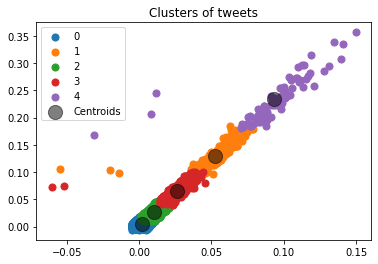

In [21]:
from sklearn.metrics import pairwise_distances_argmin
from sklearn import cluster
from sklearn import metrics
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
label = kmeans.labels_
#Getting unique labels
u_labels = np.unique(label)
for i in u_labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] ,label = i, s=50, cmap='viridis')
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],label='Centroids',c='black', s=200, alpha=0.5);
plt.title('Clusters of tweets')
plt.legend()
plt.show()

In [21]:
print ("Cluster id labels for inputted data")
print (labels)
print ("Centroids data")
print (centroids)
 
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))
 
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')
 
print ("Silhouette_score: ")
print (silhouette_score)


Cluster id labels for inputted data
[0 0 0 ... 0 0 0]
Centroids data
[[ 5.24193223e-04 -1.54514574e-02  3.61865871e-02 -1.24890469e-02
   1.13853617e-02  1.21355150e-02  9.70924739e-03 -6.53579598e-03
   5.55070350e-03  3.22298682e-03  4.57335543e-03  9.69900191e-03
   2.82711741e-02  4.62484593e-03 -9.97785293e-03  1.73764098e-02
   2.37612668e-02 -7.54141062e-03  2.77136802e-03 -2.12901589e-02
   4.62666014e-03  4.84420033e-03  9.61503293e-03 -2.89865546e-02
   1.41499117e-02  7.37956725e-03 -2.41241865e-02 -3.30716278e-03
  -5.50222630e-03  2.64638313e-03 -2.11110134e-02 -7.63876736e-03
   7.73296040e-03 -2.46511586e-02  2.38781795e-02  2.16425117e-02
  -1.81643199e-02  1.65661722e-02 -1.14862584e-02  2.46267155e-04
  -4.65207454e-03 -1.83244739e-02 -6.58736611e-03  1.07858954e-02
   3.98703441e-02  2.52057165e-02 -3.26974615e-02 -1.16687464e-02
   8.19554180e-03  4.05393913e-03  6.60206517e-03  1.41578298e-02
   1.18805887e-02 -1.55043770e-02 -4.39628074e-03 -1.01507837e-02
   2.08

## <left> <font color='#60a86d'>2- Cosine Similarity</font> </left> 

In [14]:
from sklearn.feature_extraction.text import *
from sklearn.preprocessing import normalize
tv_vec=TfidfVectorizer()
tfidf_tweets =tv_vec.fit_transform(df.Tweets_text)
word_features = tv_vec.get_feature_names()
tf_idf_norm = normalize(tfidf_tweets)
tf_idf_array = tf_idf_norm.toarray()
#pd.DataFrame(data = tf_idf_array, columns=word_features)

In [14]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 5, n_init = 20, n_jobs = 1) # n_init(number of iterations for clsutering) n_jobs(number of cpu cores to use)
kmeans.fit(tfidf_tweets)
# We look at 3 the clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(word_features[word] for word in centroid))

/home/oumaima/Downloads/opt/anaconda3/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


0 : you, to, the, if, covid, and, your, are, for, it, have, can, do, of, re, what, in, don, is, that, thank, about, not, get, vaccine
1 : the, of, covid, to, in, and, is, 19, vaccine, that, we, for, it, are, on, first, people, has, have, as, be, will, at, about, with
2 : covid, to, 19, and, for, in, it, of, on, is, with, he, that, my, they, not, have, as, vaccine, from, are, be, the, we, at
3 : abbotsford, 100th, veteran, dies, birthday, war, three, weeks, after, in, of, covid, experiment, explai, expansion, expl, expires, expire, experts, expert, experimenting, experimental, expat, expectancy, expe
4 : this, is, to, the, and, of, covid, it, in, for, year, we, all, my, not, on, have, be, that, so, people, are, was, about, but


CPU times: user 1.37 s, sys: 345 ms, total: 1.72 s
Wall time: 444 ms


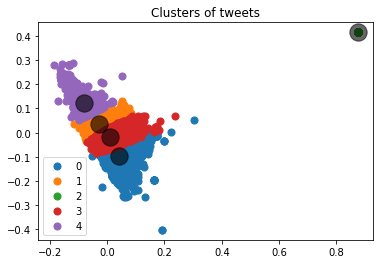

In [19]:
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
n_clusters = 5
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
kmeans = KMeans(n_clusters= n_clusters, max_iter=600, algorithm = 'auto')
%time fitted = kmeans.fit(Y_sklearn)
prediction = kmeans.predict(Y_sklearn)
label = kmeans.labels_
#Getting unique labels
u_labels = np.unique(label)
for i in u_labels:
    plt.scatter(Y_sklearn[label == i , 0] , Y_sklearn[label == i , 1] ,label = i, s=50, cmap='viridis')
centers2 = fitted.cluster_centers_
plt.scatter(centers2[:, 0], centers2[:, 1],c='black', s=300, alpha=0.6);
plt.title('Clusters of tweets')
plt.legend()
plt.show()

